# ==========================================
# Task 1: End-to-End ML Pipeline with Scikit-learn
# by Salman Khan
# ==========================================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ======================================================
# 1. PROBLEM STATEMENT & OBJECTIVE
# ======================================================
print("📌 STEP 1: PROBLEM STATEMENT")
print("Objective: Build a production-ready ML pipeline to predict Customer Churn.")
print("We will use Scikit-learn Pipelines to automate preprocessing and model training.")
print("-" * 50)

In [3]:
# ======================================================
# 2. DATASET LOADING & PREPROCESSING
# ======================================================
print("📌 STEP 2: LOADING DATA")
# Using a direct URL to the Telco Churn dataset to avoid file upload errors
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"

try:
    df = pd.read_csv(url)
    print("✅ Data Loaded Successfully!")
    print(f"Shape: {df.shape}")
except:
    print("❌ Error loading URL. Please download 'Telco-Customer-Churn.csv' manually.")

# Quick Cleaning
# 'TotalCharges' is object type, convert to numeric and handle errors
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True) # Drop missing values

# Define Features (X) and Target (y)
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0) # Encode Target

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into Train and Test sets.")
print("-" * 50)

📌 STEP 2: LOADING DATA
✅ Data Loaded Successfully!
Shape: (7043, 21)
Data split into Train and Test sets.
--------------------------------------------------


In [4]:
# ======================================================
# 3. MODEL DEVELOPMENT (PIPELINE)
# ======================================================
print("📌 STEP 3: BUILDING PIPELINE")

# Identify Numeric and Categorical columns
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = [col for col in X.columns if col not in numeric_features]

# Create Transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine into a Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create Full Pipeline (Preprocessor + Model)
# We use Random Forest as it is robust
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

print("✅ Pipeline created successfully.")
print("-" * 50)

📌 STEP 3: BUILDING PIPELINE
✅ Pipeline created successfully.
--------------------------------------------------


In [5]:
# ======================================================
# 4. TRAINING & HYPERPARAMETER TUNING
# ======================================================
print("📌 STEP 4: TRAINING WITH GRIDSEARCH")

# Define simple hyperparameters to tune (keeps it fast)
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [5, 10]
}

# Run Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=1)
grid_search.fit(X_train, y_train)

print(f"✅ Best Params: {grid_search.best_params_}")
print("-" * 50)

📌 STEP 4: TRAINING WITH GRIDSEARCH
Fitting 3 folds for each of 4 candidates, totalling 12 fits
✅ Best Params: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
--------------------------------------------------


In [6]:
# ======================================================
# 5. EVALUATION
# ======================================================
print("📌 STEP 5: EVALUATION")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {acc:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

📌 STEP 5: EVALUATION
🎯 Accuracy: 0.7939

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



📌 STEP 6: VISUALIZATION


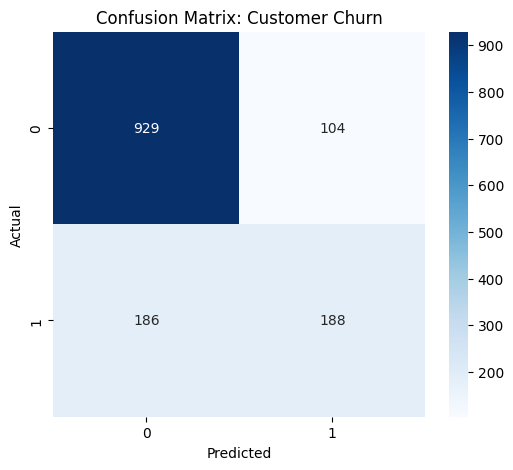

In [7]:
# ======================================================
# 6. VISUALIZATIONS
# ======================================================
print("📌 STEP 6: VISUALIZATION")

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Customer Churn')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [8]:
# ======================================================
# 7. EXPORT & SUMMARY
# ======================================================
print("📌 STEP 7: FINAL SUMMARY")
print("1. We successfully loaded the Telco Churn dataset.")
print("2. Built a Scikit-learn pipeline to handle OneHotEncoding and Scaling automatically.")
print("3. Tuned a Random Forest model using GridSearchCV.")
print(f"4. Achieved an accuracy of {acc*100:.2f}%.")
print("5. Pipeline exported as 'churn_pipeline.pkl'.")

# Save the model
joblib.dump(best_model, 'churn_pipeline.pkl')
print("\n✅ TASK COMPLETED.")

📌 STEP 7: FINAL SUMMARY
1. We successfully loaded the Telco Churn dataset.
2. Built a Scikit-learn pipeline to handle OneHotEncoding and Scaling automatically.
3. Tuned a Random Forest model using GridSearchCV.
4. Achieved an accuracy of 79.39%.
5. Pipeline exported as 'churn_pipeline.pkl'.

✅ TASK COMPLETED.
